**Jacob Petty, Sardor Nodirov, and Saad Khan**

Spring 2026

CS 443: Bio-Inspired Machine Learning

Project 1: Hebbian Learning

#### Week 1: TensorFlow, Datasets, and Custom Neural Network Library

In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Task 4. Train `LinearDecoder` on MNIST and CIFAR-10

Woohoo! Your linear decoder is built and tested! Time for some fun! 😎

To train in a reasonable amount of time, upload your project code to CoCalc so that you can train on the GPU (*See detailed instructions and demos in lecture*).

*As noted on the website, if you have a higher-end Macbook with a Pro or Max chip and ≥ 16 GB of memory, you could probably run this workload on your computer if you would prefer. This is entirely optional and the cloud will almost certainly be faster than even the fastest Mac. Setting this up would just provide some extra convenience/flexibility. See the [macOS instructions](https://cs.colby.edu/courses/S26/cs443/software.html#tf) for setup.*

Run the cell below to make sure TensorFlow is running on the GPU.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print('Running on the GPU')
else:
    print('NOT running on the GPU')

Running on the GPU


In [3]:
from image_datasets import get_dataset, train_val_split
from decoder_nets import LinearDecoder

### 4a. Train `LinearDecoder` on MNIST on the GPU

This will be a "hello world" test to make sure your `fit` method is working.

Write code in the cell below to load in MNIST

In [4]:
x_train, y_train, x_test, y_test = get_dataset('mnist', verbose=False)
x_train_split, y_train_split, x_val_split, y_val_split = train_val_split(x_train, y_train)

# KEEP ME
print(f'Your training set data have shape {x_train_split.shape} and they should be (54000, 784)')
print(f'Your training set labels have shape {y_train_split.shape} and they should be (54000,)')
print(f'Your val set data have shape {x_val_split.shape} and they should be (6000, 784)')
print(f'Your val set labels have shape {y_val_split.shape} and they should be (6000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 784)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (54000, 784) and they should be (54000, 784)
Your training set labels have shape (54000,) and they should be (54000,)
Your val set data have shape (6000, 784) and they should be (6000, 784)
Your val set labels have shape (6000,) and they should be (6000,)
Your test set data have shape (10000, 784) and they should be (10000, 784)
Your test set labels have shape (10000,) and they should be (10000,)


I0000 00:00:1770953345.403750   85309 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1770953345.403775   85309 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Train `LinearDecoder` in the cell below on MNIST for `10` epochs and a batch size of `256`! Print out your accuracy on the test set when training is done.

The **entire** process of training and evaluating test accuracy should take no more than 30 seconds (*at most!*). If it is taking longer, seek help.

Your print outs should look something like:

```
---------------------------------------------------------------------------
Dense layer output(Output Layer) shape: [1, 10]
---------------------------------------------------------------------------
Epoch 0/9, Training loss 0.533, Val loss 0.284, Val acc SURPRISE
Epoch 0 took: 2.0 secs
Epoch 1/9, Training loss 0.322, Val loss 0.257, Val acc SURPRISE
Epoch 1 took: 1.1 secs
Epoch 2/9, Training loss 0.299, Val loss 0.243, Val acc SURPRISE
Epoch 2 took: 1.1 secs
...
Epoch 9/9, Training loss 0.272, Val loss 0.234, Val acc SURPRISE
Epoch 9 took: 1.1 secs
Finished training after 10 epochs!
Linear Decoder MNIST Test accuracy: SURPRISE%
Training took: 12.55 secs
```

The val and test accuracy should be satisfyingly high — in the 90s.

In [5]:
# KEEP THIS SEED
tf.random.set_seed(0)
# Create the model
model = LinearDecoder(input_feats_shape=(784,), C=10)
# Compile the model
model.compile()
# Train the model
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train_split, y_train_split, x_val=x_val_split, y_val=y_val_split, 
                                                            batch_size=256, max_epochs=10)
# Evaluate the model on the test set
test_acc, test_loss = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


---------------------------------------------------------------------------
Dense layer output((784,)) shape: [1, 10]
---------------------------------------------------------------------------
Epoch 0/9, Training loss 0.531, Val loss 0.285, Val acc 0.9210
Epoch 0 took: 2.0 secs
Epoch 1/9, Training loss 0.325, Val loss 0.255, Val acc 0.9309
Epoch 1 took: 1.9 secs
Epoch 2/9, Training loss 0.293, Val loss 0.243, Val acc 0.9318
Epoch 2 took: 2.1 secs
Epoch 3/9, Training loss 0.279, Val loss 0.243, Val acc 0.9323
Epoch 3 took: 2.0 secs
Epoch 4/9, Training loss 0.276, Val loss 0.235, Val acc 0.9343
Epoch 4 took: 2.2 secs
Epoch 5/9, Training loss 0.269, Val loss 0.238, Val acc 0.9345
Epoch 5 took: 1.9 secs
Epoch 6/9, Training loss 0.271, Val loss 0.237, Val acc 0.9335
Epoch 6 took: 1.9 secs
Epoch 7/9, Training loss 0.267, Val loss 0.234, Val acc 0.9363
Epoch 7 took: 2.0 secs
Epoch 8/9, Training loss 0.261, Val loss 0.230, Val acc 0.9363
Epoch 8 took: 2.0 secs
Epoch 9/9, Training loss 0.265, 

### 4b. Train `LinearDecoder` on MNIST on the CPU

To appreciate the advantage for training deep networks on GPUs instead of your computer's CPU, copy-paste your code above that trains your `LinearDecoder` net on MNIST below. Instead of running it on CoCalc, run it locally on your computer. Be sure to print out the time per epoch.

*If the net takes >2 minutes per epoch on your computer, just train for one epoch then call it quits :)*

Note, did this task in a separate notebook because unable to switch to CPU mid notebook without messing with kernel, new notebook for task 4b is called extra_4b.ipynb

### 4c. Questions

**Question 1:** Approximately how long did it take for 1 epoch of training with and without the GPU. Compute the relative compute time (`gpu_time_per_epoch`/`cpu_time_per_epoch`). What do you think?

**Answer 1:** GPU time per epoch was approximately 2.0 seconds while CPU time per epoch was approximately 0.7 seconds, giving a relative compute time of about 2.9x—surprisingly, the CPU was actually faster! I think this happened because LinearDecoder is so simple that GPU overhead from data transfer and synchronization dominates the tiny computation. However, I'm curious to see how the GPU performs on the larger CIFAR-10 dataset, where the increased computational workload might finally justify the GPU overhead and show a more typical speedup.

### 4d. Train `LinearDecoder` on CIFAR-10

Now let's train on CIFAR-10. Run this (*and all subsequent large training sessions*) on CoCalc/the GPU 😊

Write code in the cell below to load in CIFAR-10 with global RGB normalization.

In [6]:
x_train, y_train, x_test, y_test = get_dataset('cifar10', verbose=False)
x_train_split, y_train_split, x_val_split, y_val_split = train_val_split(x_train, y_train)

# KEEP ME
print(f'Your training set data have shape {x_train_split.shape} and they should be (45000, 3072)')
print(f'Your training set labels have shape {y_train_split.shape} and they should be (45000,)')
print(f'Your val set data have shape {x_val_split.shape} and they should be (5000, 3072)')
print(f'Your val set labels have shape {y_val_split.shape} and they should be (5000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 3072)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (45000, 3072) and they should be (45000, 3072)
Your training set labels have shape (45000,) and they should be (45000,)
Your val set data have shape (5000, 3072) and they should be (5000, 3072)
Your val set labels have shape (5000,) and they should be (5000,)
Your test set data have shape (10000, 3072) and they should be (10000, 3072)
Your test set labels have shape (10000,) and they should be (10000,)


Train `LinearDecoder` on CIFAR-10 in the cell below for `10` epochs and use a batch size of `256`.

*You should anticipate no more than ~1 min of total training time on the GPU. If this is far off, please seek help.*

Plot the training and val loss over epochs. Put test acc in the title. *If everything is working, your training and validation loss should steadily decrease then start to plateau by the end of training.*

In [7]:
# KEEP THIS SEED
tf.random.set_seed(0)
# Create the model
model = LinearDecoder(input_feats_shape=(3072,), C=10)
# Compile the model
model.compile()
# Train the model
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train_split, y_train_split, x_val=x_val_split, y_val=y_val_split, 
                                                            batch_size=256, max_epochs=10)
# Evaluate the model on the test set
test_acc, test_loss = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

---------------------------------------------------------------------------
Dense layer output((3072,)) shape: [1, 10]
---------------------------------------------------------------------------
Epoch 0/9, Training loss 1.847, Val loss 1.837, Val acc 0.3684
Epoch 0 took: 2.0 secs
Epoch 1/9, Training loss 1.782, Val loss 1.833, Val acc 0.3826
Epoch 1 took: 1.5 secs
Epoch 2/9, Training loss 1.757, Val loss 1.830, Val acc 0.3894
Epoch 2 took: 1.8 secs
Epoch 3/9, Training loss 1.756, Val loss 1.807, Val acc 0.3816
Epoch 3 took: 1.5 secs
Epoch 4/9, Training loss 1.724, Val loss 1.825, Val acc 0.3780
Epoch 4 took: 1.7 secs
Epoch 5/9, Training loss 1.714, Val loss 1.840, Val acc 0.3744
Epoch 5 took: 1.5 secs
Epoch 6/9, Training loss 1.703, Val loss 1.839, Val acc 0.3774
Epoch 6 took: 1.9 secs
Epoch 7/9, Training loss 1.708, Val loss 1.831, Val acc 0.3770
Epoch 7 took: 1.5 secs
Epoch 8/9, Training loss 1.700, Val loss 1.838, Val acc 0.3624
Epoch 8 took: 1.6 secs
Epoch 9/9, Training loss 1.695,

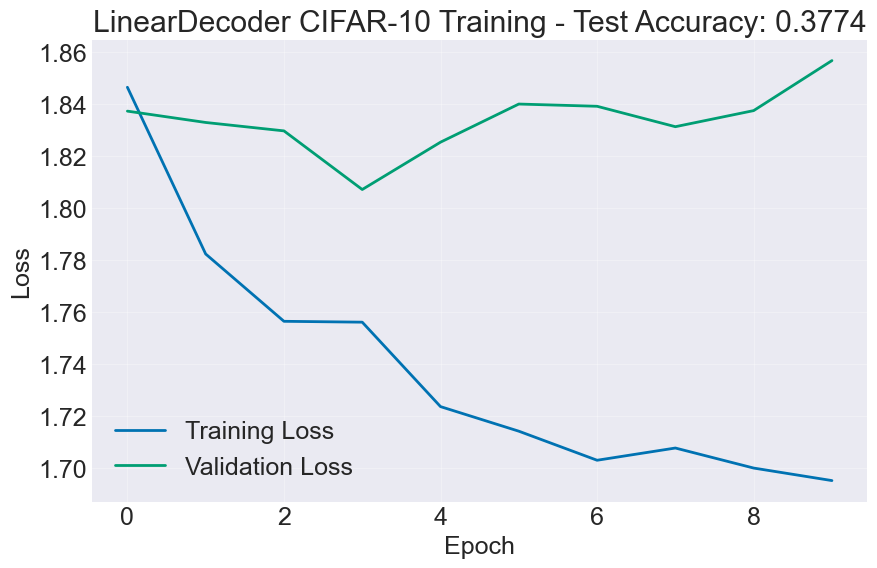

In [8]:
# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_loss_hist, label='Training Loss', linewidth=2)
plt.plot(val_loss_hist, label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'LinearDecoder CIFAR-10 Training - Test Accuracy: {test_acc:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 4e. Experiment: Effect of batch size on runtime and accuracy

To develop your intuition about how the choice of batch size generally affects runtime and accuracy on a dataset like CIFAR-10, run an experiment in which fresh `LinearDecoder` nets are trained for `10` epochs with one of the following batch sizes:<br/>
`[128, 256, 512, 1024, 2048]`. After each training run, record the test accuracy and runtime.

Create two plots:
1. The test accuracy (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
2. The runtime (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.

**Note:**
- Your `fit` method prints the runtime per epoch, but in this task you should record the total runtime over training and prediction. (in seconds). To do this, it may make sense to use the time module to record the total time in the notebook cell below.
- You should be running this on the GPU!

In [9]:
# KEEP THIS SEED
tf.random.set_seed(0)

batch_sizes = [128, 256, 512, 1024, 2048]
test_accuracies = []
runtimes = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")
    
    # Time the entire training and evaluation process
    start_time = time.time()
    
    # Create and compile model
    model = LinearDecoder(input_feats_shape=(3072,), C=10)
    model.compile()
    
    # Train the model
    train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(
        x_train_split, y_train_split, 
        x_val=x_val_split, y_val=y_val_split, 
        batch_size=batch_size, 
        max_epochs=10,
        verbose=False
    )
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)
    
    # Record total runtime
    total_time = time.time() - start_time
    
    test_accuracies.append(float(test_acc))
    runtimes.append(total_time)
    
    print(f"Batch size {batch_size}: Test Acc = {test_acc:.4f}, Runtime = {total_time:.2f}s")


Training with batch size: 128
---------------------------------------------------------------------------
Dense layer output((3072,)) shape: [1, 10]
---------------------------------------------------------------------------
Finished training after 10 epochs!
Training took: 33.26 secs
Batch size 128: Test Acc = 0.3637, Runtime = 33.93s

Training with batch size: 256
---------------------------------------------------------------------------
Dense layer output((3072,)) shape: [1, 10]
---------------------------------------------------------------------------
Finished training after 10 epochs!
Training took: 17.00 secs
Batch size 256: Test Acc = 0.3750, Runtime = 17.35s

Training with batch size: 512
---------------------------------------------------------------------------
Dense layer output((3072,)) shape: [1, 10]
---------------------------------------------------------------------------
Finished training after 10 epochs!
Training took: 9.64 secs
Batch size 512: Test Acc = 0.3779, R

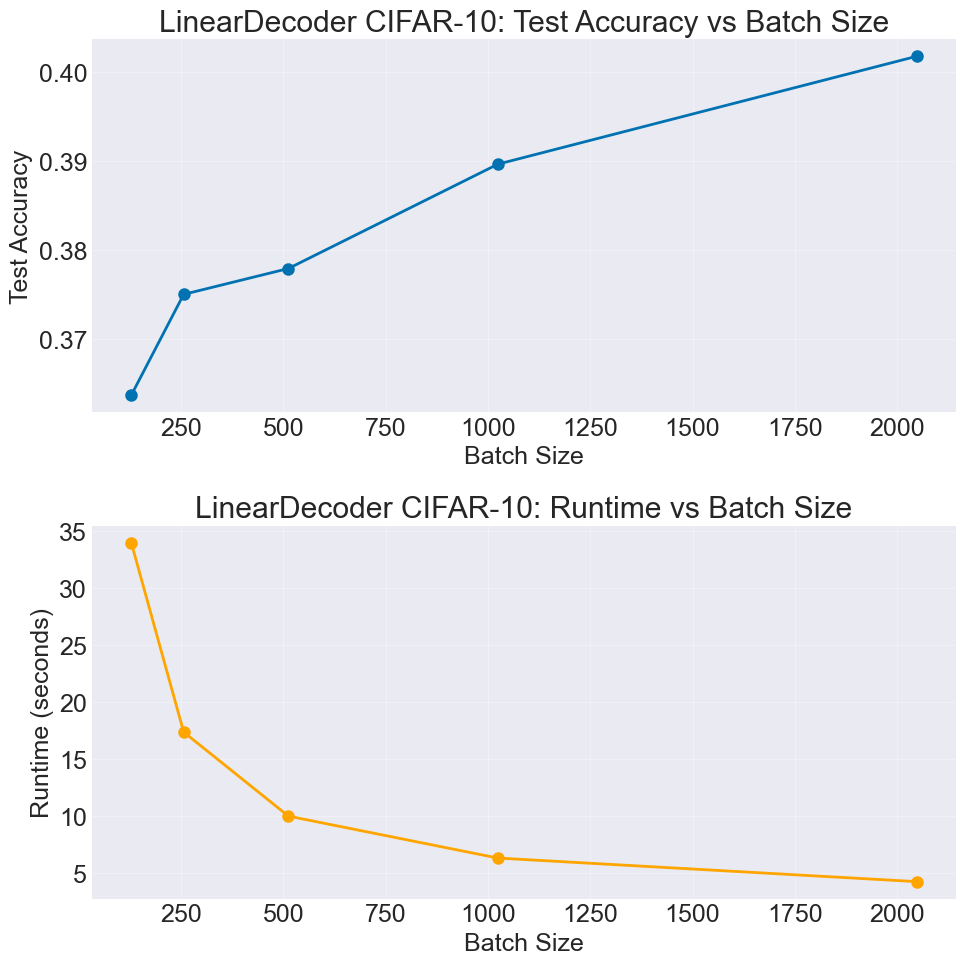

In [11]:
# Plot 1: Test accuracy vs batch size
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(batch_sizes, test_accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('LinearDecoder CIFAR-10: Test Accuracy vs Batch Size')
plt.grid(True, alpha=0.3)

# Plot 2: Runtime vs batch size
plt.subplot(2, 1, 2)
plt.plot(batch_sizes, runtimes, marker='o', linewidth=2, markersize=8, color='orange')
plt.xlabel('Batch Size')
plt.ylabel('Runtime (seconds)')
plt.title('LinearDecoder CIFAR-10: Runtime vs Batch Size')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4f. Questions

**Question 2:** What do the plots suggest to you about the relationship between batch size and accuracy? Please be specific,citing evidence from your plots.

**Question 3:** Do you find this relationship surprising? Why or why not?

**Answer 2:** The plots show that batch size has minimal effect on test accuracy for LinearDecoder on CIFAR-10. The accuracy remains nearly flat across all batch sizes (128-2048), hovering around 0.37-0.38. This suggests that for this simple linear model, the batch size parameter does not significantly influence final model performance, only training speed.

**Answer 3:** Not particularly surprising. Since LinearDecoder is a single dense layer, the model has very limited capacity to learn complex patterns, so batch size variations don't meaningfully affect convergence. The runtime clearly decreases with larger batch sizes (from ~34s to ~4s), which is expected due to fewer gradient updates, but accuracy remains constant because the model is already near its performance ceiling regardless of batch composition.